In [ ]:
#multiclass classification using softmax, 1vsAll, 1vs1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#utility function

plot_colors = "ryb"
plot_step = 0.02

def decision_boundary(X, y, model, iris, two=None):
    x_min, x_max = X[0:, 0].min() -1, X[:, 0].max() + 1
    y_min, y_max = X[0:, 1].min() -1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad = 0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contour(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    if two:
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
        for i, color in zip(np.unique(y), plot_colors):
            
            idx = np.where( y==i)
            plt.scatter(X[idx, 0], X[idx, 1], label=y, cmap=plt.cm.RdYlBu, s=15)
        plt.show()
        
    else:
        set_ ={0,1,2}
        print(set_)
        for i, color in zip(range(3), plot_colors):
            idx = np.where(y==i)
            if np.any(idx):
                set_.remove()
                plt.scatter(X[idx, 0], X[idx, 1], label=y, cmap=plt.cm.RdYlBu, edgecolors='black', s=15)
                
        for i in set_:
            idx = np.where(iris.target==i)
            plt.scatter(X[idx, 0], X[idx, 1], marker='x', color='black')
        plt.show()

In [3]:
#function to plot probabliity of belonging to each class, 
#each column -> prob(belonging to a class)
#row number -> sample number

def plot_probability_array(X, probability_array):
    plot_array = np.zeros((X.shape[0],30))
    col_start = 0
    ones =np.ones((X.shape[0],30))
    
    for class_, col_end in enumerate([10,20,30]):
        plot_array[:, col_start:col_end] = np.repeat(probability_array[:, class_].reshape(-1,1), 10, axis=1)
        col_start=col_end
    plt.imshow(plot_array)
    plt.xticks([])
    plt.ylabel("samples")
    plt.xlabel("probabiltiy of 3 classes")
    plt.colorbar()
    plt.show()

In [7]:
#loading dataset iris and using features 1 and 3
pair=[1, 3]
iris = datasets.load_iris()
X = iris.data[:, pair]
y = iris.target
np.unique(y)

array([0, 1, 2])

Text(0, 0.5, 'petal width')

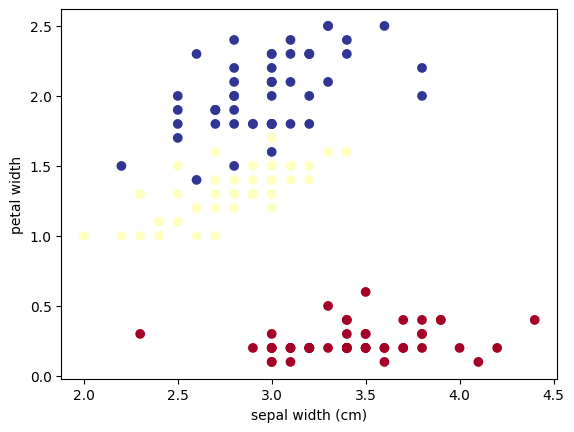

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("sepal width (cm)")
plt.ylabel("petal width")